In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
df = pd.read_csv('D:/house data.csv')
df.shape

(4600, 18)

In [13]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
import matplotlib.pylab as plt
import seaborn as sns

In [6]:
X = df[['sqft_above','sqft_lot']]
y = df['price']

In [7]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


In [8]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

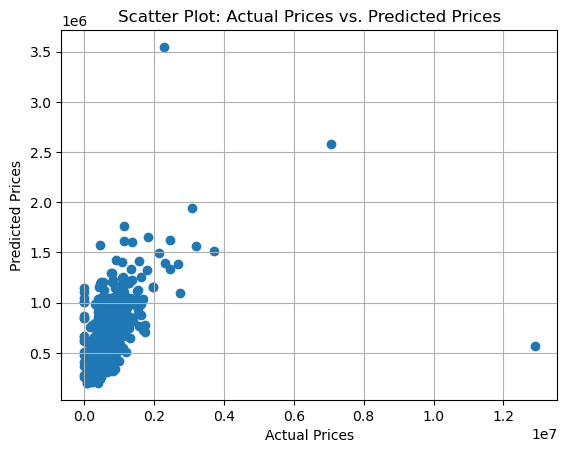

In [9]:
X = df[['sqft_above','sqft_living','sqft_basement','bedrooms','bathrooms','view']]
y = df['price']
model_lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
model_lr.fit(X_train, y_train)
prediction = model_lr.predict(X_test)

# Plot the scatter plot
plt.scatter(y_test, prediction,)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Scatter Plot: Actual Prices vs. Predicted Prices')
plt.grid(True)

# Add the linear regression line

# plt.scatterplot(y_test, color='red', linewidth=2)
# plt.plot(prediction, color='blue', linewidth=2)

plt.show()

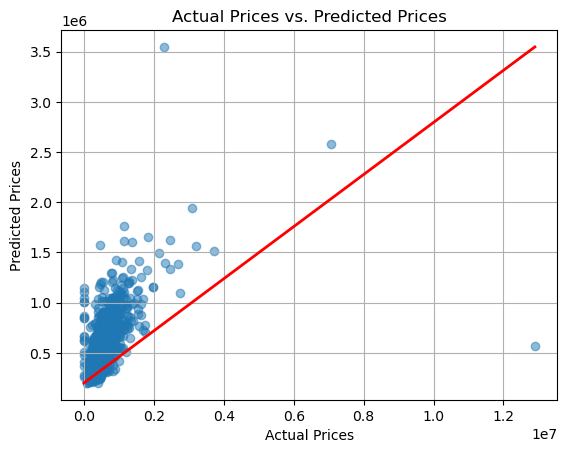

In [10]:
plt.scatter(y_test, prediction, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(prediction), max(prediction)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.grid(True)
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, prediction)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, prediction)

# Calculate R-squared (R2)
r2 = r2_score(y_test, prediction)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 185133980386.83148
Root Mean Squared Error (RMSE): 430271.98419933347
Mean Absolute Error (MAE): 176032.34734892612
R-squared (R2): 0.2766832482135766


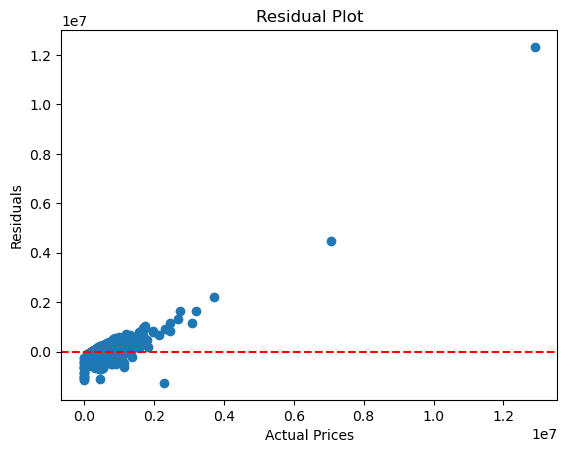

In [12]:
residuals = y_test - prediction

# Scatter plot of residuals
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()